In [12]:
#From the dataset_31_credit-g.arff file:
#"Two datasets are provided. The original dataset, in the form provided
# by Prof. Hofmann, contains categorical/symbolic attributes and is in the file "german.data". 

# For algorithms that need numerical attributes, Strathclyde University  produced the file
# "german.data-numeric".  This file has been edited and several indicator variables added
# to make it suitable for algorithms which cannot cope with categorical variables.
# Several attributes that are ordered categorical (such as attribute 17) have
# been coded as integer. This was the form used by StatLog."



##TODO: check what version we are working with

# Loading data

In [13]:
import pandas as pd
import seaborn as sns
from scipy.io.arff import loadarff

raw_data = loadarff('dataset_31_credit-g.arff')
df_data = pd.DataFrame(raw_data[0])

df_data.head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,b'<0',6.0,b'critical/other existing credit',b'radio/tv',1169.0,b'no known savings',b'>=7',4.0,b'male single',b'none',...,b'real estate',67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',b'good'
1,b'0<=X<200',48.0,b'existing paid',b'radio/tv',5951.0,b'<100',b'1<=X<4',2.0,b'female div/dep/mar',b'none',...,b'real estate',22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'bad'
2,b'no checking',12.0,b'critical/other existing credit',b'education',2096.0,b'<100',b'4<=X<7',2.0,b'male single',b'none',...,b'real estate',49.0,b'none',b'own',1.0,b'unskilled resident',2.0,b'none',b'yes',b'good'
3,b'<0',42.0,b'existing paid',b'furniture/equipment',7882.0,b'<100',b'4<=X<7',2.0,b'male single',b'guarantor',...,b'life insurance',45.0,b'none',b'for free',1.0,b'skilled',2.0,b'none',b'yes',b'good'
4,b'<0',24.0,b'delayed previously',b'new car',4870.0,b'<100',b'1<=X<4',3.0,b'male single',b'none',...,b'no known property',53.0,b'none',b'for free',2.0,b'skilled',2.0,b'none',b'yes',b'bad'


# Convert data to correct format

In [14]:
for col, dtype in df_data.dtypes.items():
    if dtype == object:  # Only process byte object columns.
        df_data[col] = df_data[col].apply(lambda x: x.decode("utf-8"))

# EDA

## Types and structure

In [15]:
df_data.head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [16]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [17]:
df_data.nunique()

checking_status             4
duration                   33
credit_history              5
purpose                    10
credit_amount             921
savings_status              5
employment                  5
installment_commitment      4
personal_status             4
other_parties               3
residence_since             4
property_magnitude          4
age                        53
other_payment_plans         3
housing                     3
existing_credits            4
job                         4
num_dependents              2
own_telephone               2
foreign_worker              2
class                       2
dtype: int64

In [18]:
for col in df_data.select_dtypes(include=[object]):
    print(f" Column {col}, has options:, {df_data[col].unique()}")

 Column checking_status, has options:, ['<0' '0<=X<200' 'no checking' '>=200']
 Column credit_history, has options:, ['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']
 Column purpose, has options:, ['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'domestic appliance' 'repairs' 'other' 'retraining']
 Column savings_status, has options:, ['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500']
 Column employment, has options:, ['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1']
 Column personal_status, has options:, ['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']
 Column other_parties, has options:, ['none' 'guarantor' 'co applicant']
 Column property_magnitude, has options:, ['real estate' 'life insurance' 'no known property' 'car']
 Column other_payment_plans, has options:, ['none' 'bank' 'stores']
 Column housing, has options:, ['own' 'for free' 'rent']
 Column job, has options:, ['

In [19]:
df_data.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


### Features:
| Feature                | Type        | Description                                              | Number of unique values |
|------------------------|-------------|----------------------------------------------------------|-------------------------|
| checking_status        | qualitative | Status of existing checking account                      | 4                       |
| duration               | numeric     | Duration in months                                       | 33                      |
| credit_history         | qualitative | Credit history                                           | 5                       |
| purpose                | qualitative | Purpose                                                  | 10                      |
| credit_amount          | numeric     | Credit amount                                            | 921                     |
| saving_status          | qualitative | Savings account/bond                                     | 5                       |
| employment             | qualitative | Present employment since                                 | 5                       |
| installment_commitment | numeric     | Installment rate in percentage of disposable income      | 4                       |
| personal status        | qualitative | Personal status and sex                                  | 4                       |
| other_parties          | qualitative | Other debtors / guarantors                               | 3                       |
| residence_since        | numeric     | Present residence since                                  | 4                       |
| property_magnitude     | qualitative | Property                                                 | 4                       |
| age                    | numeric     | Age in years                                             | 53                      |
| other_payment_plans    | qualitative | Other installment payments                               | 3                       |
| housing                | qualitative | Housing                                                  | 3                       |
| existing_credits       | numeric     | Number of existing credits at this bank                  | 4                       |
| job                    | qualitative | Job                                                      | 4                       |
| num_dependents         | numeric     | Number of people being liable to provide maintenance for | 2                       |
| own_telephone          | qualitative | Telephone                                                | 2                       |
| foreign_worker         | qualitative | Foreign worker                                           | 2                       |

### Outcome:
Class: good or bad (qualitative)

This dataset contains a custom cost matrix:
|       | Good | Bad |
|-------|------|-----|
| Good  |  0   |  1  |
| Bad   |  5   |  0    

The columns are the predicted class and the rows are the actual assigned class (so the true label).

What does this mean? It means that it is worse to classify a customer as good when they are actually bad compared to classifying a customer as bad when they are actually good.
This is probably because when a customer is classified as good when they are actually bad, they will not be able to pay back the credit.

## Visualizations

<Axes: >

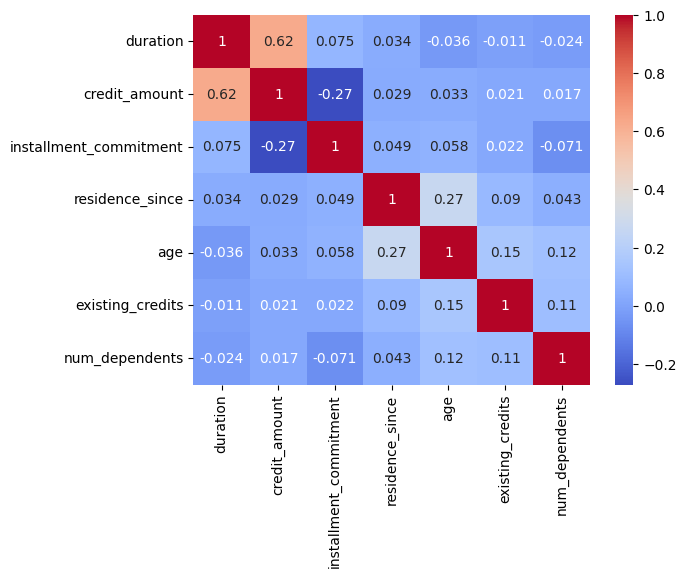

In [21]:
sns.heatmap(df_data.corr(numeric_only=True), annot = True, fmt='.2g',cmap= 'coolwarm')

<Axes: xlabel='duration', ylabel='credit_amount'>

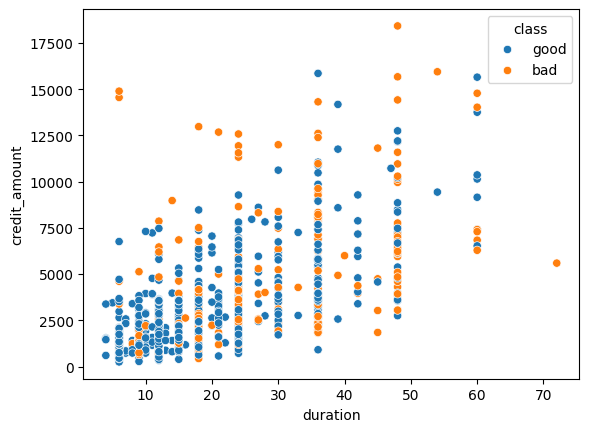

In [22]:
sns.scatterplot(data=df_data, x="duration", y="credit_amount", hue="class")